<h1><center>Regional and Gender Differences in Youth Not in Education, Employment, or Training (NEET) Rates in Italy</center></h1>
<center>Mariia Starodubtseva <br>mariia.starodubtseva@studenti.unitn.it<center>

### Introduction

Youth disengagement from education, employment, or training (NEET) is a significant socio-economic challenge in many countries, including Italy, which consistently records the highest NEET rates in Europe [1]. The NEET phenomenon is a matter of concern, as it often leads to long-term issues such as economic dependency, social exclusion, and a diminished workforce. Therefore, understanding the spatial and demographic variations in NEET rates, as well as the factors influencing them, is crucial for developing effective policies to address this problem.

Various studies have examined NEET rates in Italy using different methodologies. Some have taken a longitudinal approach, analyzing trends over time and the impact of socio-economic events such as the 2008 financial crisis and labor market policies [2]. Others have focused on predictive factors, using statistical models to assess the influence of individual characteristics—such as gender, education, and family background—alongside regional economic indicators like GDP, employment rates, internet access, and poverty levels [3], [4]. Comparative studies have also explored NEET rates and their determinants across different European countries, including Italy [4]. While much of the research focuses on the general factors influencing NEET rates in Italy, studies specifically addressing the gender or regional differences either analyze the factors influencing age-gender differences over time [5] or highlight the north-south divide in Italy without delving deeply into specific gender-regional differences [6].

This study aims to fill this gap by focusing specifically on regional differences in NEET rates and gender disparities within each region using the most recent data available from 2023. By examining these variations, the research will identify specific trends, clusters of neighboring regions with similar NEET rates, and any outliers, to better understand the geographical and gender dynamics that contribute to youth disengagement from education and employment in Italy. In addition to exploring regional and gender trends, the study will investigate how NEET rates are associated with general unemployment in each region, as well as how gender differences in NEET rates align with gender disparities in unemployment.

The paper, hence, addresses several **research questions**:
1. How do youth NEET rates differ across Italian regions? 
2. What spatial patterns emerge in NEET rates, particularly among neighboring regions? 
3. How do gender differences in NEET rates vary across regions? 
4. How are youth NEET rates related to general unemployment rates across Italian regions? 
5. How are gender differences in NEET related to gender differences in unemployment? 

By exploring these questions, the study aims to uncover regional and gender-related trends and provide valuable insights into the challenges of youth disengagement in Italy, ultimately contributing to a better understanding of the socio-economic dynamics affecting this demographic.

### Data Description

The datasets used in this analysis are sourced from ISTAT (Italian National Institute of Statistics), with no significant restrictions on their use. All datasets are uploaded to the data folder of the project for accessibility and further processing. The first dataset [7] contains detailed information regarding the administrative boundaries of Italy, including the geometries of the country’s regions, provinces, and other territorial units. For the purpose of this study, data from 20 Italian regions are utilized for spatial analysis. The dataset is provided in a projected Coordinate Reference System (CRS: EPSG:32632), which uses the UTM zone 32N. This CRS is particularly appropriate for Italy, as it minimizes distortion in distance, area, and shape across the central and southern regions, ensuring accurate spatial measurements.

The second dataset [8] focuses on NEET (Not in Education, Employment, or Training) statistics for individuals aged 18-29 in 2023. This dataset reports the percentage of individuals in this age group who are classified as NEET, with a breakdown by gender (total, male, and female) and regions. The age range of 18-29 was selected as it represents a transitional period when individuals typically move out of high school and either enter the workforce or pursue higher education. Those who are neither employed nor enrolled in education during this phase are particularly vulnerable to socio-economic marginalization. Therefore, analyzing NEET rates for this age group provides valuable insights into youth disengagement from education or employment. It is important to note that the data used in this study is from 2023, as data for 2024 is not yet fully available.

The third dataset [9] presents unemployment rates for the regions of Italy in 2023, with breakdowns by gender (total, male, and female) for individuals aged 15-74. The choice to focus on the total unemployment rate for the 15-74 age range allows for a comprehensive view of labor market conditions, facilitating the comparison with the NEET data for the 18-29 age group. This comparison is essential for understanding the potential relationship between overall unemployment trends and NEET rates among youth in different regions.

Both the NEET and unemployment statistics are derived by ISTAT from the Labour Force Survey, which provides official estimates based on continuous data collection from approximately 60,000 representative households across Italy. This survey captures a broad range of labor market indicators and is designed to comply with international standards set by the International Labour Organization (ILO) and the European Union. The ISTAT search queries for both the NEET and unemployment datasets utilized in this analysis are available in the references section of the report.

### Data Analysis

#### Preprocesing

The preprocessing phase involves several steps to prepare the datasets for analysis, including data cleaning, validation, transformation, and merging of the administrative territories with NEET and unemployment datasets.

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import zipfile
import urllib
import os
import esda
import splot.esda as splot
import numpy as np
import libpysal as lps
import statsmodels.api as sm
import seaborn as sns

First, the full dataset of Italian administrative territories is downloaded, and the shapefile for the regions is read.

In [3]:
if not os.path.exists('data/Limiti01012024_g'):
    zip_file_url = (
    "https://www.istat.it/storage/cartografia/confini_amministrativi/"
    "generalizzati/2024/Limiti01012024_g.zip"
    )
    zip_file_name = "Limiti01012024_g.zip"
    urllib.request.urlretrieve(zip_file_url ,zip_file_name)
    z = zipfile.ZipFile(zip_file_name)
    z.extractall(path='data')
    os.remove(zip_file_name)

In [4]:
regions=gpd.read_file(
    'data/Limiti01012024_g/Reg01012024_g/Reg01012024_g_WGS84.shp'
    )

The geometries are checked for validity, and any invalid ones are corrected to ensure the spatial data is correct and consistent.

In [5]:
regions.geometry.is_valid[regions.geometry.is_valid==False]

19    False
dtype: bool

In [6]:
regions.geometry = regions.geometry.make_valid()

The dataset's Coordinate Reference System (CRS) is also confirmed as EPSG:32632, which ensures the spatial data is accurately projected for Italy’s central and southern regions. 

In [7]:
regions.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The final dataset contains the following columns: COD_RIP, COD_REG, DEN_REG, Shape_Leng, Shape_Area, and geometry.

In [8]:
regions.head(3)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.17, 390748.643 50..."
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366..."


For the NEET (Not in Education, Employment, or Training) data, the CSV file is read, and only the relevant columns — Territory, Gender, and Value — are retained. 

In [9]:
neet = pd.read_csv('data/NEET2023.csv')
print(list(neet.columns))

['ITTER107', 'Territory', 'TIPO_DATO_FOL', 'Data type', 'SEXISTAT1', 'Gender', 'ETA1', 'Age class', 'TIME', 'Select time', 'Value', 'Flag Codes', 'Flags']


In [10]:
neet = neet[['Territory', 'Gender', 'Value']]

The data is checked for missing values, and is then transformed by pivoting the Gender column to create separate columns for total, females, and males, with their corresponding NEET percentages in the respective cells. A new column, neet_diff, is also created to show the difference between male and female NEET percentages (males - females), which provides an understanding of the gender gap.

In [11]:
neet.isnull().sum()

Territory    0
Gender       0
Value        0
dtype: int64

In [12]:
neet_pivot = neet.pivot(index='Territory', 
                        columns='Gender', 
                        values='Value').reset_index()
neet_pivot.columns.name = None  
neet_pivot['neet_diff'] = neet_pivot['males'] - neet_pivot['females']
neet_pivot.head(3)

,Territory,females,males,total,neet_diff
0,Abruzzo,20.410862,16.770162,18.52578,-3.640700
1,Basilicata,21.042223,19.121655,20.04017,-1.920568
2,Calabria,32.624759,32.941801,32.78783,0.317042


To ensure consistency between the datasets, the region names in the NEET data are checked and adjusted to match the names in the regions dataset. Specifically, "Valle d'Aosta / Vallée d'Aoste" is changed to "Valle d'Aosta," and "Trentino Alto Adige / Südtirol" is changed to "Trentino-Alto Adige."

In [13]:
print((neet_pivot['Territory'].unique()))

['Abruzzo' 'Basilicata' 'Calabria' 'Campania' 'Emilia-Romagna'
 'Friuli-Venezia Giulia' 'Lazio' 'Liguria' 'Lombardia' 'Marche' 'Molise'
 'Piemonte' 'Puglia' 'Sardegna' 'Sicilia' 'Toscana'
 'Trentino Alto Adige / Südtirol' 'Umbria'
 "Valle d'Aosta / Vallée d'Aoste" 'Veneto']


In [14]:
neet_pivot['Territory'] = neet_pivot['Territory'].replace({
    "Valle d'Aosta / Vallée d'Aoste": "Valle d'Aosta",
    "Trentino Alto Adige / Südtirol": "Trentino-Alto Adige"
})

Finally, the two datasets are merged using the DEN_REG column from the regions dataset and the Territory column from the NEET dataset. This combines the spatial data with the NEET statistics. The merged dataset, neet_regions, contains the columns: Territory, females, males, total, neet_diff, and geometry.

In [15]:
neet_regions = regions.merge(neet_pivot, 
                             left_on="DEN_REG", 
                             right_on="Territory")
neet_regions = neet_regions[['Territory', 'females', 'males', 'total',
                              'neet_diff', 'geometry']]
neet_regions.head(3)

,Territory,females,males,total,neet_diff,geometry
0,Piemonte,16.425123,12.053888,14.159770,-4.371235,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,Valle d'Aosta,12.438173,12.003859,12.215145,-0.434314,"POLYGON ((390652.643 5091766.17, 390748.643 50..."
2,Lombardia,15.028450,10.126030,12.490855,-4.902420,"MULTIPOLYGON (((485536.498 4985444.636, 485366..."


The unemployment dataset follows a similar structure to the NEET dataset, so the same preprocessing steps are applied. The necessary columns are retained, missing values are handled, and the dataset is pivoted to create separate columns for total, females, and males. Additionally, the data is filtered to include only records from 2023 to ensure consistency with the NEET dataset. A new column, unempl_diff, is created to represent the difference between male and female unemployment rates (males - females), providing insights into gender disparities in unemployment. After verifying and standardizing region names, the unemployment data is merged with the regions dataset in the same way as the NEET data, resulting in a final dataset with the columns: Territory, females, males, total, unempl_diff, and geometry.

In [16]:
unempl = pd.read_csv('data/Unemployment2023.csv')
print(list(unempl.columns))

['ITTER107', 'Territory', 'TIPO_DATO_FOL', 'Data type', 'SEXISTAT1', 'Gender', 'ETA1', 'Age class', 'TIME', 'Select time', 'Value', 'Flag Codes', 'Flags']


In [17]:
unempl = unempl[unempl['TIME'] == '2023']
unempl = unempl[['Territory', 'Gender', 'Value']]
unempl.head(3)

,Territory,Gender,Value
0,Marche,males,4.386121
5,Valle d'Aosta / Vallée d'Aoste,total,4.042185
10,Marche,females,6.127196


In [18]:
unempl.isnull().sum()

Territory    0
Gender       0
Value        0
dtype: int64

In [19]:
unempl_pivot = unempl.pivot(index='Territory', 
                            columns='Gender', 
                            values='Value').reset_index()
unempl_pivot.columns.name = None 
unempl_pivot["unempl_diff"] = (
    unempl_pivot["males"] - unempl_pivot["females"]
)
unempl_pivot.head(3)

,Territory,females,males,total,unempl_diff
0,Abruzzo,8.750921,7.533587,8.052396,-1.217334
1,Basilicata,9.681699,6.092891,7.486547,-3.588808
2,Calabria,18.953024,14.036743,15.896039,-4.916281


In [20]:
unempl_pivot['Territory'] = unempl_pivot['Territory'].replace({
    "Valle d'Aosta / Vallée d'Aoste": "Valle d'Aosta",
    "Trentino Alto Adige / Südtirol": "Trentino-Alto Adige"
})

In [21]:
unempl_regions = regions.merge(unempl_pivot, 
                               left_on="DEN_REG", 
                               right_on="Territory")
unempl_regions = unempl_regions[['Territory', 'females', 'males', 
                                 'total', 'unempl_diff', 'geometry']]
unempl_regions.head(3)

,Territory,females,males,total,unempl_diff,geometry
0,Piemonte,7.142674,5.377015,6.169227,-1.765659,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,Valle d'Aosta,4.100391,3.990105,4.042185,-0.110286,"POLYGON ((390652.643 5091766.17, 390748.643 50..."
2,Lombardia,4.770911,3.429615,4.024770,-1.341296,"MULTIPOLYGON (((485536.498 4985444.636, 485366..."


To ensure consistency between the two final datasets for further analysis, it is checked whether the Territory and geometry columns in neet_regions and unempl_regions are identical.

In [22]:
neet_regions['Territory'].equals(unempl_regions['Territory'])

True

In [23]:
neet_regions['geometry'].equals(unempl_regions['geometry'])

True

#### Descriptive Statistics

Before proceeding with the geospatial analysis, descriptive statistics is conducted for both the NEET and unemployment datasets to better understand their distributions and key trends.

In [24]:
for column in neet_regions.columns:
    if pd.api.types.is_numeric_dtype(neet_regions[column]):
        descriptive_stats = neet_regions[column].describe()
        skew = neet_regions[column].skew()
        kurt = neet_regions[column].kurtosis()
        print(f"""{column}: Stats: {descriptive_stats.to_dict()}, 
              Skew: {skew:.2f}, Kurt: {kurt:.2f}""")


females: Stats: {'count': 20.0, 'mean': 20.336111350000003, 'std': 7.623341506634057, 'min': 12.113962, '25%': 14.918720749999999, '50%': 16.9314905, '75%': 22.4827455, 'max': 37.102614}, 
              Skew: 1.08, Kurt: -0.06
males: Stats: {'count': 20.0, 'mean': 16.676449500000004, 'std': 7.957474880337835, 'min': 7.93374, '25%': 10.3565845, '50%': 13.375539, '75%': 20.31158375, 'max': 32.941801}, 
              Skew: 1.03, Kurt: -0.29
total: Stats: {'count': 20.0, 'mean': 18.440239799999997, 'std': 7.587715780952496, 'min': 10.629005, '25%': 12.970443750000001, '50%': 13.999196999999999, '75%': 21.8213375, 'max': 34.014915}, 
              Skew: 1.10, Kurt: -0.14
neet_diff: Stats: {'count': 20.0, 'mean': -3.65966185, 'std': 3.651292099139719, 'min': -10.730583, '25%': -6.202662499999999, '50%': -4.005967500000001, '75%': -1.8025394999999995, 'max': 5.575822000000002}, 
              Skew: 0.64, Kurt: 1.07


In [25]:
for column in unempl_regions.columns:
    if pd.api.types.is_numeric_dtype(unempl_regions[column]):
        descriptive_stats = unempl_regions[column].describe()
        skew = unempl_regions[column].skew()
        kurt = unempl_regions[column].kurtosis()
        print(f"""{column}: Stats: {descriptive_stats.to_dict()}, 
              Skew: {skew:.2f}, Kurt: {kurt:.2f}""")

females: Stats: {'count': 20.0, 'mean': 9.276171, 'std': 5.079857707266384, 'min': 3.445162, '25%': 6.02582625, '50%': 7.7167655, '75%': 10.1515915, 'max': 20.736794}, 
              Skew: 1.19, Kurt: 0.39
males: Stats: {'count': 20.0, 'mean': 6.7894468, 'std': 3.9807862566235985, 'min': 2.330417, '25%': 3.96258725, '50%': 5.1552065, '75%': 8.758999, 'max': 15.503755}, 
              Skew: 1.17, Kurt: 0.24
total: Stats: {'count': 20.0, 'mean': 7.8175687, 'std': 4.299623126005753, 'min': 2.843381, '25%': 4.862848, '50%': 6.1360365, '75%': 9.69948125, 'max': 17.414553}, 
              Skew: 1.18, Kurt: 0.37
unempl_diff: Stats: {'count': 20.0, 'mean': -2.4867242, 'std': 1.6343208576064343, 'min': -6.114930999999999, '25%': -3.5473344999999994, '50%': -2.2296329999999998, '75%': -1.61214125, 'max': 0.33501700000000056}, 
              Skew: -0.58, Kurt: 0.24


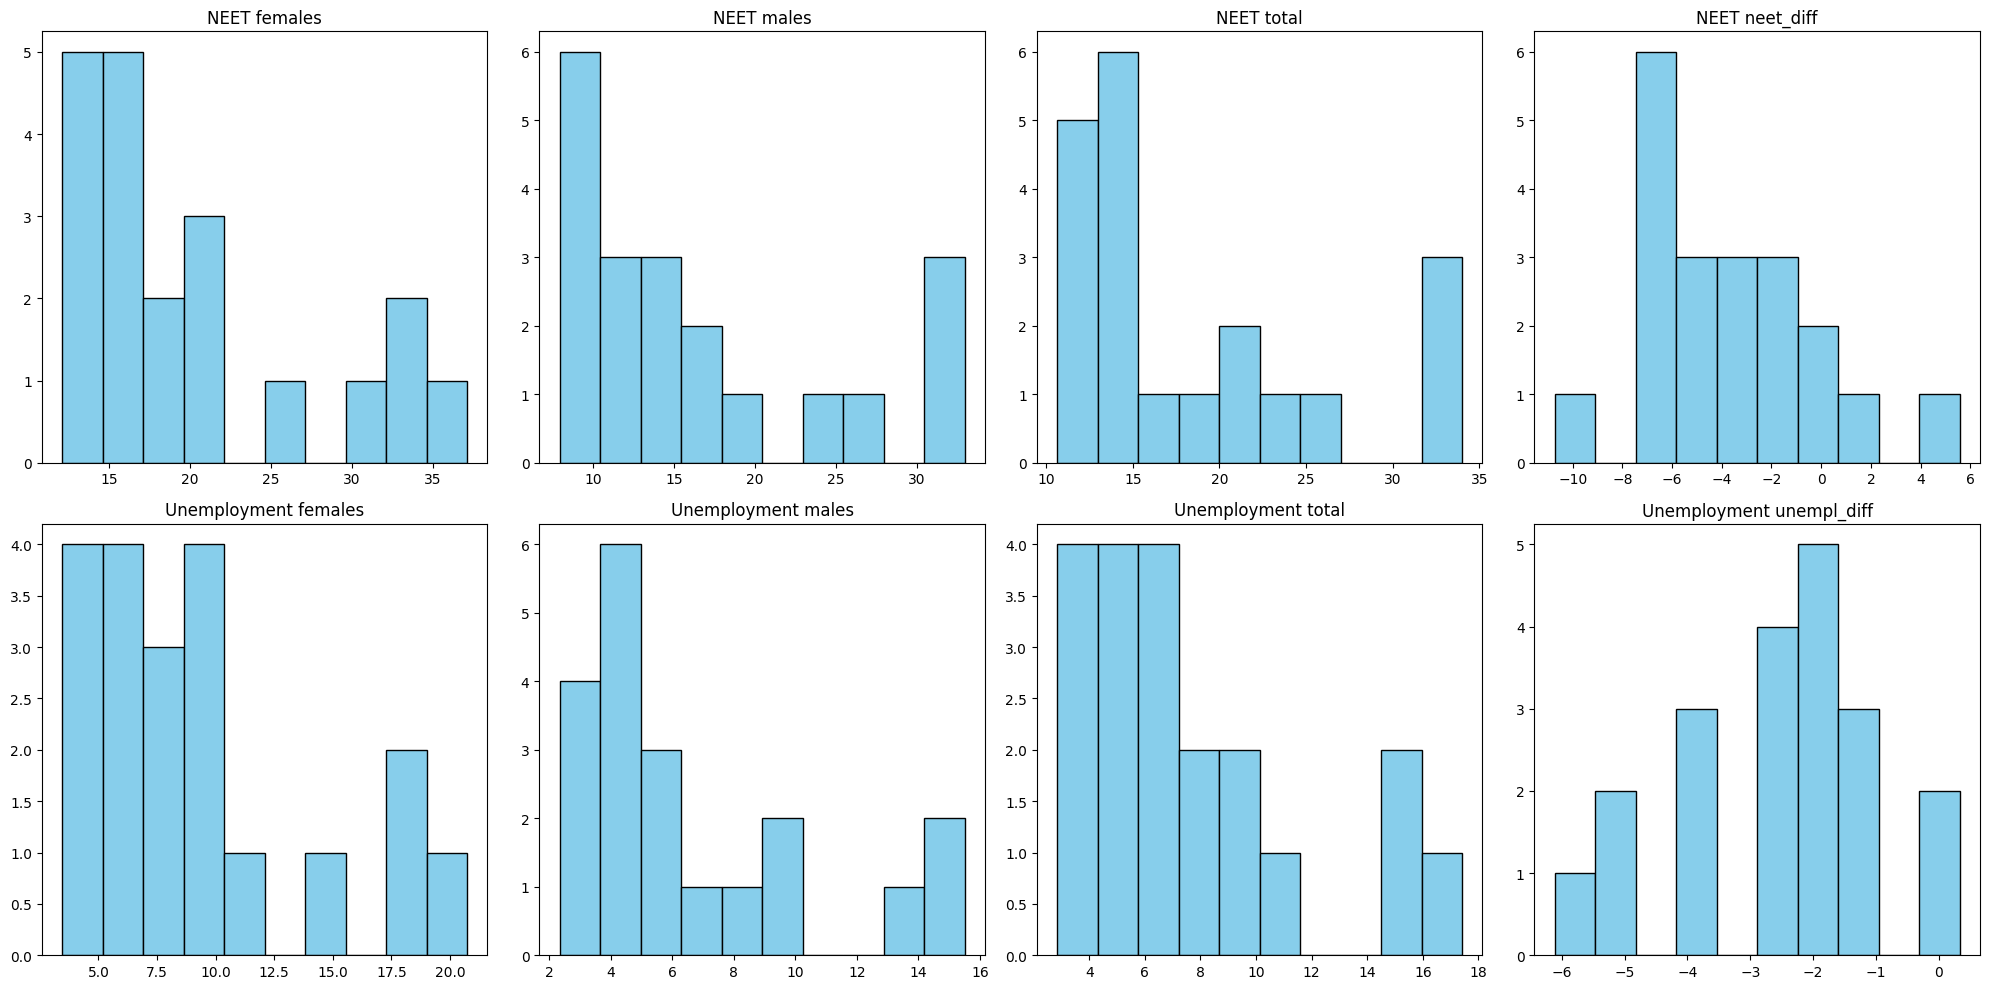

In [26]:
neet_numeric_columns, unempl_numeric_columns = (
    neet_regions.select_dtypes(include=["number"]).columns,
    unempl_regions.select_dtypes(include=["number"]).columns,
)
neet_columns_count = len(neet_numeric_columns)
unempl_columns_count = len(unempl_numeric_columns)
max_columns = max(neet_columns_count, unempl_columns_count)


fig, axs = plt.subplots(2, max_columns, figsize=(20, 10))
for i, column in enumerate(neet_numeric_columns):
    ax = axs[0, i] if max_columns > 1 else axs[0]
    ax.hist(neet_regions[column], color='skyblue', edgecolor='black')
    ax.set_title(f"NEET {column}")

for i, column in enumerate(unempl_numeric_columns):
    ax = axs[1, i] if max_columns > 1 else axs[1]
    ax.hist(unempl_regions[column], color='skyblue', edgecolor='black')
    ax.set_title(f"Unemployment {column}")

plt.tight_layout()

#fig.savefig('plots/neet_unempl_hist.png')

The descriptive statistics for the NEET and unemployment rates reveal some similar trends, but also some key differences. 

The female NEET rate has a mean of 20.34% with a standard deviation of 7.62%, and is right-skewed, indicating **most regions have lower rates but a few outliers with higher rates**. The male NEET rate has a mean of 16.68% and a standard deviation of 7.96%, showing a similar pattern. The total NEET rate is 18.44%, also following this trend. The NEET difference (male - female) is -3.66, indicating **males generally have lower rates**, though **some regions have significantly higher male NEET** rates (max: 5.58).

Similarly, the female unemployment rate has a mean of 9.28% with a standard deviation of 5.08%, and is right-skewed, suggesting **most regions have lower unemployment rates with a few outliers**. The male unemployment rate has a mean of 6.79% and a standard deviation of 3.98%, displaying a similar pattern. The total unemployment rate is 7.82%, aligning with the gender-specific rates. The unemployment difference (male - female) is -2.49%, suggesting that **males generally have lower unemployment rates**, with only **a few regions showing an insignificantly higher male unemployment** rate (max: 0.34).

Notably, both NEET and unemployment rates show regional disparities, but **the relative variability of unemployment rates (compared to their mean) appears larger**, suggesting that employment conditions fluctuate more dramatically across regions. However, the **NEET difference shows more significant outliers**, with some regions having much higher female or male rates than the opposite gender.

The skewness and kurtosis values show that the distributions are not perfectly normal due to skewness (mostly right-skewed), but with fairly normal tail behavior. 

#### Geospatial Analysis

**To address the first research question**, the total NEET rates (18-29 years old) across Italian regions are mapped using a choropleth map. This approach facilitates a clear visualization of regional disparities in NEET rates, highlighting areas with both higher and lower rates across the country.

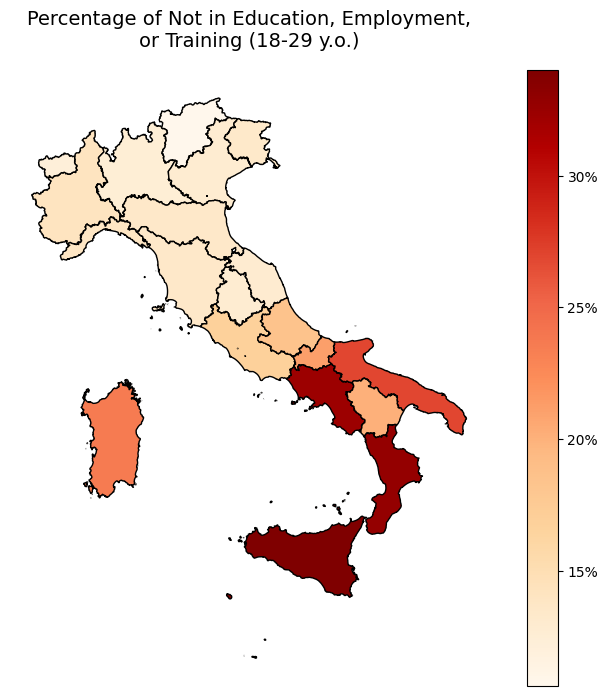

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
neet_regions.plot(
    column="total",
    cmap="OrRd",
    edgecolor="black",
    legend=True,
    ax=ax
)
ax.set_title(
    "Percentage of Not in Education, Employment,\n"
    "or Training (18-29 y.o.)",
    fontsize=14
)
ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]  
cbar.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f"{x:.0f}%"))
plt.show()

#fig.savefig('plots/total_neet_map.png')

This plot highlights a clear economic and social disparity between Northern and Southern Italy, with the south experiencing higher unemployment and disengagement among young people. **Sicily, Calabria, and Campania** are shaded dark red, indicating **the highest NEET rates**, exceeding 30%. In contrast, **northern regions such as Lombardy, Veneto, and Trentino-Alto Adige** show significantly **lower rates** (around 15% or less). Central Italy and Sardinia fall in the mid-range of NEET rates.

**To address the second research question**, Moran's I is used to assess the degree of spatial autocorrelation, helping to determine whether similar NEET rates tend to cluster in nearby regions.

To define the spatial relationships between regions, K-nearest neighbor (KNN) weights are used. KNN is particularly appropriate for Italy, as it ensures each region is connected to a fixed number of nearest neighbors, which is crucial for isolated regions like islands. Unlike border or distance-based weights, which may fail to connect distant or non-contiguous regions, KNN provides a consistent method to define spatial relationships regardless of geographical proximity.

A for loop is employed to determine the optimal value of k, selecting the one that yields the highest Moran's I value (**k=4**). A random seed of 42 is set for reproducibility, and 999 permutations are performed to ensure a robust estimation of the p-value.

In [28]:
for k in range(2, 11): 
    w_knn = lps.weights.KNN.from_dataframe(neet_regions, k=k)
    w_knn.transform = "r"
    neet_values = neet_regions["total"].values
    np.random.seed(42) 
    moran = esda.Moran(neet_values, w_knn, permutations=999)
    
    if k == 4:
        print(f"k={k}, Moran's I: {moran.I}, P-value: {moran.p_sim} <--")
    else:
        print(f"k={k}, Moran's I: {moran.I}, P-value: {moran.p_sim}")


k=2, Moran's I: 0.5771704262949584, P-value: 0.004
k=3, Moran's I: 0.6430571490910675, P-value: 0.001
k=4, Moran's I: 0.6536698673067425, P-value: 0.001 <--
k=5, Moran's I: 0.5965249637191206, P-value: 0.001
k=6, Moran's I: 0.5509125727272757, P-value: 0.001
k=7, Moran's I: 0.5041302239765986, P-value: 0.001
k=8, Moran's I: 0.44410237074589454, P-value: 0.001
k=9, Moran's I: 0.43755746769753373, P-value: 0.001
k=10, Moran's I: 0.4148654401645904, P-value: 0.001


In [29]:
w_knn = lps.weights.KNN.from_dataframe(neet_regions, k=4)
w_knn.transform = "r"
neet_values = neet_regions["total"].values  
np.random.seed(42) 
moran_knn = esda.Moran(neet_values, w_knn, permutations=999)
print(f"Moran's I: {moran_knn.I}")
print(f"P-value: {moran_knn.p_sim}")

Moran's I: 0.6536698673067425
P-value: 0.001


The **global Moran’s I of 0.65** suggests that there is a positive autocorrelation, hence, clusters of NEET rates exist (such as high values near high values, low values near low values).

To visualize this spatial autocorrelation, a Moran scatterplot is generated. The scatterplot displays the standardized NEET rates on the x-axis and the corresponding spatially lagged values on the y-axis. 

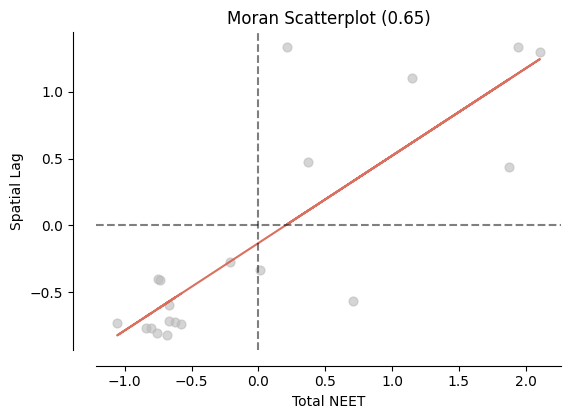

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
splot.moran_scatterplot(moran_knn, ax=ax)
ax.set_xlabel("Total NEET")
plt.show()

#fig.savefig('plots/moran_scatterplot.png')

A positive slope in the scatterplot further confirms the presence of clustering, where high NEET rates are surrounded by high values and low NEET rates by low values. The plot is divided into four quadrants, with most regions falling into either the Low-Low (LL) or High-High (HH) quadrants, indicating consistent patterns of both low and high NEET rates across neighboring regions. However, there is one point in the fourth quadrant (bottom right), where high NEET rates are accompanied by low spatially lagged values. This appears to be an outlier, though it may ultimately prove to be statistically insignificant.

**Local Moran's I** is also calculated to reveal specific regions that exhibit high or low values relative to their neighbors, highlighting clusters or outliers. KNN weights, a seed of 42, and 999 permutations are used. A Local Indicators of Spatial Association (LISA) cluster plot is generated to visualize the results of the Local Moran's I analysis. Only regions with a significant Local Moran’s I (p-value < 0.05) are included. The plot shows how each region of Italy is classified based on its local spatial association with neighboring regions: High-High (HH), Low-Low (LL), or not significant (ns).

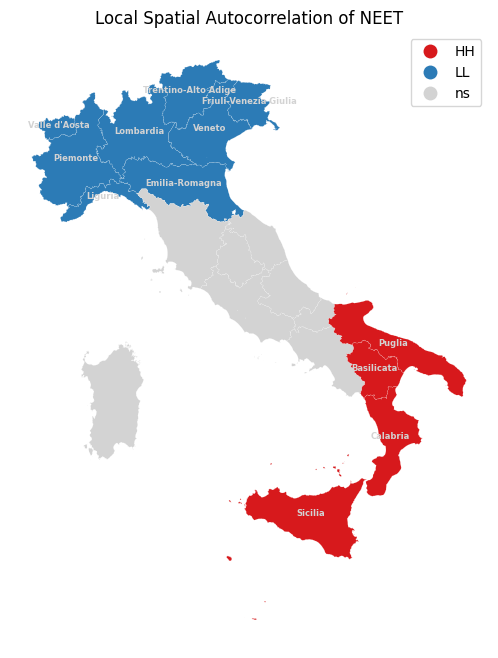

In [32]:
lisa_knn = esda.Moran_Local(neet_values, w_knn, 
                            permutations=999, seed=42)
significant = lisa_knn.p_sim < 0.05  
labels = neet_regions[significant] 

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
splot.lisa_cluster(lisa_knn, neet_regions, p=0.05, ax=ax)
ax.set_title("Local Spatial Autocorrelation of NEET")
for idx, row in labels.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y  
    ax.text(x, y, row["Territory"], fontsize=6, ha='center',
            color='lightgrey', weight='bold')
plt.show()

#fig.savefig('plots/lisa_cluster.png')

The plot shows that **Sicilia, Calabria, Basilicata, and Puglia** are identified as **High-High (HH)** clusters (highlighted in red), indicating these regions have high NEET rates surrounded by other high NEET rate regions. On the other hand, **Liguria, Piemonte, Valle d'Aosta, Lombardia, Emilia-Romagna, Veneto, Trentino Alto Adige, and Friuli Venezia Giulia** are categorized as **Low-Low (LL)** clusters (highlighted in blue), representing areas with low NEET rates surrounded by other low NEET rate regions. Other regions do not belong to statistically significant clusters, as their local Moran's I values are not significant, suggesting no spatial autocorrelation in NEET rates in those areas. This pattern underscores a clear geographical divide in NEET rates, with high-rate regions in the South surrounded by similarly high-rate neighbors, while the North features low-rate regions clustered together.

**To address the third research question**, the percentage difference in NEET rates between males and females across regions is mapped using a choropleth plot. A two-slope normalization centers the map at 0, indicating no difference. Negative values, where females have higher NEET rates, are shown in red; while positive values, where males have higher NEET rates, are shown in blue. Regions with no significant difference are represented in white or close to white.

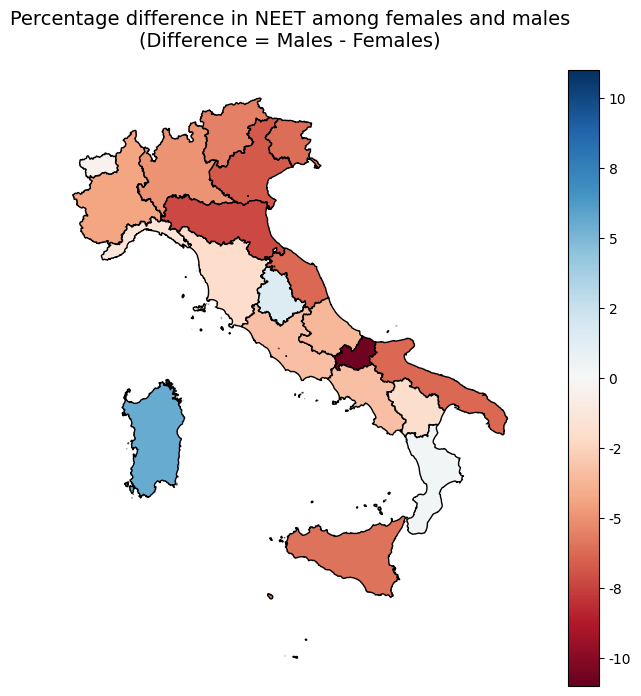

In [120]:
norm = mcolors.TwoSlopeNorm(vmin=-11, vcenter=0, vmax=11)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
neet_regions.plot(
    column="neet_diff", 
    cmap="RdBu", 
    norm=norm,
    edgecolor="black",
    legend=True, 
    ax=ax
)
ax.set_title(
    "Percentage difference in NEET among females and males\n"
    "(Difference = Males - Females)",
    fontsize=14
)
ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]  
cbar.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f"{x:.0f}"))
plt.show()

#fig.savefig('plots/neet_diff_map.png')

The NEET difference plot reveals less obvious trends compared to the previous map of total NEET rates across Italian regions, where the pattern was more apparent—lower rates in the north and higher rates in the south. In contrast, the NEET difference plot displays more variation, with neighboring regions showing a range of colors, indicating both positive and negative differences between males and females. 

In [121]:
territories = ['Molise', 'Sardegna', 'Calabria', "Valle d'Aosta"]
neet_pivot[
    neet_pivot['Territory'].isin(territories)
].sort_values(by='neet_diff', key=abs, ascending=False)

,Territory,females,males,total,neet_diff
10,Molise,26.804313,16.073730,21.199263,-10.730583
13,Sardegna,20.787888,26.363710,23.687561,5.575822
18,Valle d'Aosta,12.438173,12.003859,12.215145,-0.434314
2,Calabria,32.624759,32.941801,32.787830,0.317042


For example, **Molise**, with a relatively high total NEET rate of 21%, shows a significant negative difference of -10.73, indicating **a much higher NEET rate for females (27%) compared to males (16%)**.

On the other hand, **Sardegna**, with a total NEET rate of 24%, exhibits a significant positive difference of 5.58, indicating that **males (26%) have a higher NEET rate than females (21%)**. This points to a gender-specific issue in male youth unemployment and disengagement from education in Sardegna.

Valle d'Aosta and Calabria show the smallest differences in NEET rates. However, the contexts differ: in **Valle d'Aosta**, both males and females have **relatively low NEET rates (around 12%)**, while in **Calabria**, both genders face **high NEET rates (around 33%)**.

In general, females tend to have higher NEET rates than males, as shown by the prevalence of red shades in many regions, especially in areas like Molise. However, some regions, such as Sardegna, demonstrate the opposite trend, with males having higher NEET rates. These mixed patterns suggest that gender disparities in NEET rates are not uniform across Italy, highlighting the need for region-specific and gender-targeted policies and interventions.

To explore **how NEET rates and gender differences relate to general unemployment** and its gender disparity, several additional plots and tests are performed. First, the total unemployments rates (15-74 years old) across Italian regions are mapped using a choropleth map.

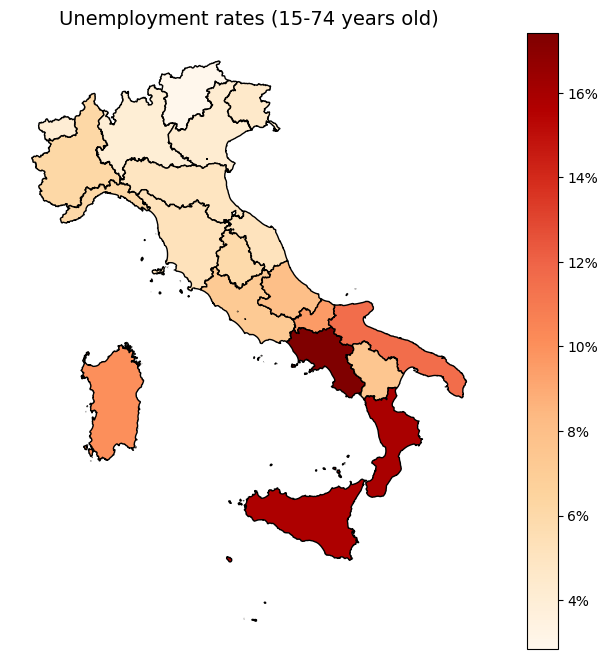

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
unempl_regions.plot(
    column="total",
    cmap="OrRd",
    edgecolor="black",
    legend=True,
    ax=ax
)
ax.set_title("Unemployment rates (15-74 years old)", fontsize=14)
ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]  
cbar.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f"{x:.0f}%"))
plt.show()

#fig.savefig('plots/total_unempl_map.png')

The plot shows that total NEET rates follow a pattern similar to total unemployment, with high rates in the south and lower rates in the north of Italy. **Sicily, Calabria, and Campania** have **the highest unemployment rates**, while northern regions such as **Lombardy, Veneto, and Trentino-Alto Adige** show significantly **lower rates**.

To statistically check this linear relationship between NEET and unemployment, **Pearson's correlation** of total rates is performed. The results are visualized with a scatter plot and a trend line.

In [123]:
neet_unempl = neet_regions.merge(
    unempl_regions.drop(columns=['geometry']),  
    on="Territory", 
    suffixes=('_neet', '_unempl')
)

correlation = neet_unempl['total_neet'].corr(neet_unempl['total_unempl'])

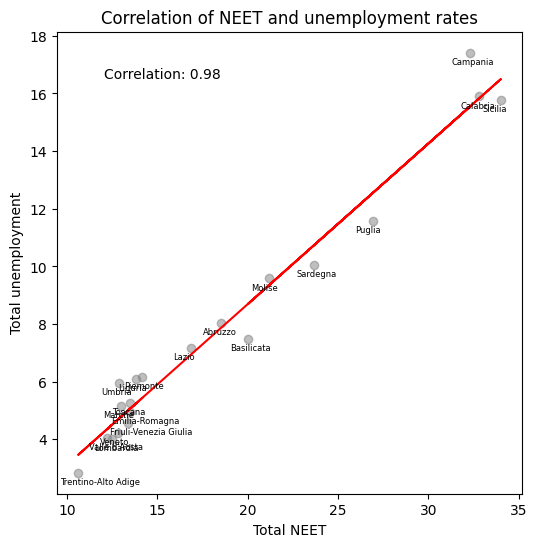

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(neet_unempl['total_neet'], neet_unempl['total_unempl'], 
           color='grey', alpha=0.5)
ax.set_title("Correlation of NEET and unemployment rates")
ax.set_xlabel("Total NEET")
ax.set_ylabel("Total unemployment")
z = np.polyfit(neet_unempl['total_neet'], neet_unempl['total_unempl'], 1)
p = np.poly1d(z)
ax.plot(neet_unempl['total_neet'], p(neet_unempl['total_neet']), 
        color='red')
ax.text(0.1, 0.9, f"Correlation: {correlation:.2f}", 
        transform=ax.transAxes)
for idx, row in neet_unempl.iterrows():
    ax.text(row['total_neet']-1, row['total_unempl']-0.4, 
            row['Territory'], fontsize=6)
plt.show()

#fig.savefig('plots/neet_unempl_corr.png')

The results, with a **correlation of 0.98**, indicate a very **strong positive relationship** between NEET and unemployment rates. The scatter plot  shows that all regions are closely aligned with the red trend line, further reinforcing the strong correlation.

Next, a **linear regression** is performed to model the relationship between total NEET rates and unemployment rates. The regression equation will provide insight into how NEET rates change in response to unemployment rates across regions. After fitting the regression model, **Moran's I of the residuals** is calculated to check for spatial autocorrelation in the unexplained variation. This will help determine if there are regional patterns in the residuals that suggest a spatially structured relationship not captured by the linear model.

In [125]:
X = neet_unempl['total_unempl'] 
y = neet_unempl['total_neet'] 
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_neet   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     545.7
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           6.49e-15
Time:                        15:56:01   Log-Likelihood:                -33.955
No. Observations:                  20   AIC:                             71.91
Df Residuals:                      18   BIC:                             73.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8663      0.659      7.381   

The OLS regression results show a **strong relationship** between total NEET rates and total unemployment rates, with an **R-squared value of 0.968**, indicating that nearly **97% of the variation in NEET rates is explained by unemployment**. A one-unit increase in unemployment is associated with a statistically significant 1.74-unit rise in NEET rates.

In [126]:
residuals = ols_model.resid
np.random.seed(42)
moran_residuals = esda.Moran(residuals, w_knn, permutations=999)
print(f"Moran's I for residuals: {moran_residuals.I}")
print(f"P-value for Moran's I: {moran_residuals.p_sim}")

Moran's I for residuals: 0.01936768786110807
P-value for Moran's I: 0.259


Since Moran's I of the OLS residuals is **not significant (0.019 with p-value = 0.26)**, there is **no significant spatial autocorrelation in the residuals**, suggesting that spatial dependence has already been adequately addressed. 

While spatial models like SAR or SEM could be explored, the absence of significant spatial autocorrelation in the residuals suggests they may not provide additional explanatory power. Given the robustness of the OLS results, further spatial modeling could add complexity without yielding meaningful new insights. Therefore, the current model might be sufficient for understanding the relationship between NEET and unemployment across regions.

The same procedure is applied to the NEET and unemployment gender differences to test if there is **a relationship between the gender differences in NEET rates and unemployment rates**. Pearson's correlation is calculated, followed by OLS regression and Moran’s I for the residuals, to assess the strength of the relationship and check for spatial autocorrelation in the unexplained variation.

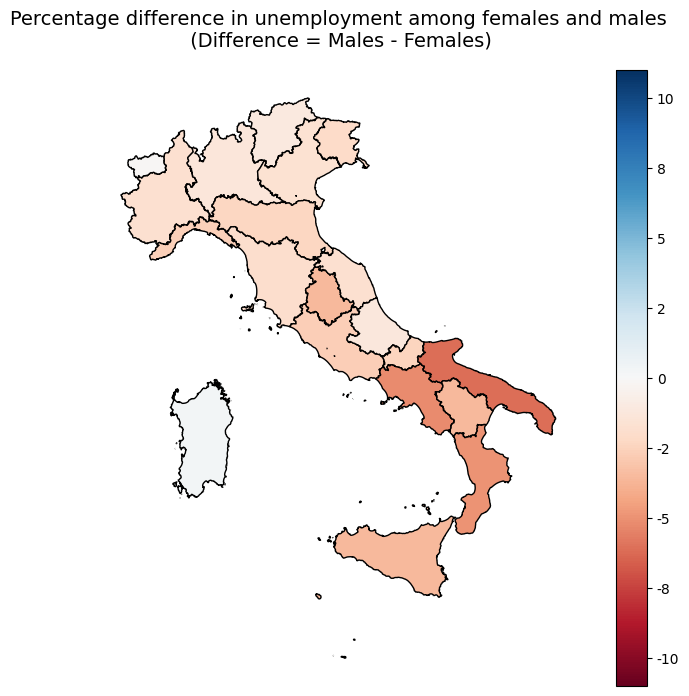

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
unempl_regions.plot(
    column="unempl_diff", 
    cmap="RdBu", 
    norm=norm,
    edgecolor="black",
    legend=True, 
    ax=ax
)
ax.set_title(
    "Percentage difference in unemployment among females and males\n (Difference = Males - Females)",
    fontsize=14)
ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]  
cbar.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f"{x:.0f}"))
plt.show()

#fig.savefig('plots/unempl_diff_map.png')

In [128]:
territories = ['Molise', 'Sardegna', 'Calabria', "Valle d'Aosta"]
unempl_pivot[
    unempl_pivot['Territory'].isin(territories)
].sort_values(by='unempl_diff', key=abs, ascending=False)

,Territory,females,males,total,unempl_diff
2,Calabria,18.953024,14.036743,15.896039,-4.916281
10,Molise,11.028163,8.592765,9.582475,-2.435398
13,Sardegna,9.859401,10.194418,10.050500,0.335017
18,Valle d'Aosta,4.100391,3.990105,4.042185,-0.110286


The gender differences in unemployment rates are **less pronounced** than the NEET differences, with **Molise** showing a **small difference of -2.43**, indicating slightly higher female unemployment, compared to -10.7 for NEET. **Sardegna** has a **near-neutral difference of 0.33**, suggesting that unemployment rates are nearly equal, whereas for NEET, the male rate is about 6 percentage points higher. Small differences are also observed in **Calabria and Valle d'Aosta**, with total unemployment being much higher in Calabria (16%) than in Valle d'Aosta (4%). Notably, in Calabria, the difference in unemployment has increased compared to NEET, with female unemployment being almost 2 percentage points higher than male unemployment. In general, the pattern of higher female unemployment rates across regions aligns with the pattern of higher female NEET rates.

To statistically check the relationship between NEET and unemployment gender differences, a correlation test and a scatterplot are performed. The scatter plot shows the association between gender differences in NEET and unemployment, with a red regression line representing the observed relationship. The dashed black line represents a 1:1 relationship (slope = 1), indicating a perfect correlation between the two variables.

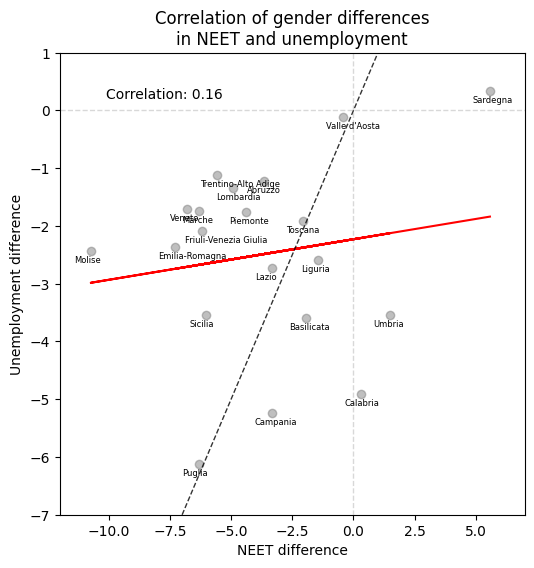

In [129]:
correlation_diff = neet_unempl['neet_diff'].corr(
    neet_unempl['unempl_diff']
)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(neet_unempl['neet_diff'], neet_unempl['unempl_diff'], 
           color='grey', alpha=0.5)
ax.set_title(
    "Correlation of gender differences\n"
    "in NEET and unemployment"
)
ax.set_xlabel("NEET difference")
ax.set_ylabel("Unemployment difference")
z = np.polyfit(neet_unempl['neet_diff'], neet_unempl['unempl_diff'], 1)
p = np.poly1d(z)
ax.plot(neet_unempl['neet_diff'], p(neet_unempl['neet_diff']), 
        color='red')
ax.text(0.1, 0.9, f"Correlation: {correlation_diff:.2f}", 
        transform=ax.transAxes)
for idx, row in neet_unempl.iterrows():
    ax.text(row['neet_diff']-0.7, row['unempl_diff']-0.2, 
            row['Territory'], fontsize=6)
ax.plot([-10, 10], [-10, 10], color='black', linestyle='--', 
        linewidth=1, alpha=0.8)
ax.set_xlim(-12, 7)
ax.set_ylim(-7, 1)
ax.axvline(0, color='grey', linewidth=1, alpha=0.3, linestyle='--')
ax.axhline(0, color='grey', linewidth=1, alpha=0.3, linestyle='--')
plt.show()

#fig.savefig('plots/neet_unempl_diff_corr.png')

While total NEET and unemployment rates show a strong correlation (0.98), the **relationship between gender differences in NEET and unemployment is much weaker (0.16)**. This suggests that while regions with high unemployment generally have high NEET rates, **the gender gaps in these measures must be influenced by different factors**. 

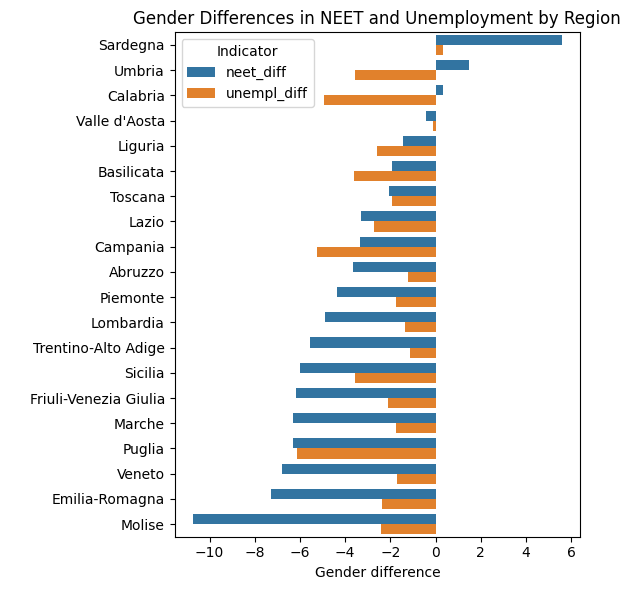

In [130]:
neet_unempl_sorted = neet_unempl.sort_values(
    by="neet_diff", ascending=False)
df_melted = neet_unempl_sorted.melt(
    id_vars="Territory", 
    value_vars=["neet_diff", "unempl_diff"], 
    var_name="Indicator", value_name="Difference")

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y="Territory", 
            x="Difference", 
            hue="Indicator", 
            data=df_melted, 
            order=neet_unempl_sorted["Territory"], 
            orient='h', 
            ax=ax)
ax.set_title("Gender Differences in NEET and Unemployment by Region", 
             fontsize=12)
ax.set_ylabel(" ") 
ax.set_xlabel("Gender difference")  
ax.legend(title="Indicator")
plt.tight_layout()
plt.show()

#fig.savefig('plots/neet_unempl_diff_barplot.png')

For **Umbria and Calabria**, the relationship between gender differences in NEET and unemployment shows contrasting patterns rather than a direct correlation. **Umbria** has a **slightly higher male NEET rate (+1.50)** but **much higher female unemployment (-3.55)**. In contrast, **Calabria** shows almost **no NEET gender gap (+0.32)** but even **greater female unemployment (-4.92)**. This suggests that in Umbria, young men (18–29) are more likely to be disengaged from education or training, but in the broader working-age population (15–74), women face greater difficulties in securing employment. In Calabria, both genders have similar NEET rates among youth, yet women experience significantly higher unemployment overall, indicating that gender disparities in the labor market persist beyond early adulthood.

In **Molise**, **female NEET rates are significantly higher**, but **unemployment differences are more balanced**, indicating that young women are more disengaged from education/training, though this gap does not necessarily translate into a much higher overall female unemployment rate. In **Sardegna**, **young males are more likely to be NEET**, but the **unemployment gap across the broader population is minimal**, suggesting that while more men are out of education/training, both genders face similar employment challenges later on.

For **Valle d'Aosta, Toscana, and Puglia**, the gender differences in NEET and unemployment follow **a more linear pattern**. **Puglia** shows the strongest relationship, with young women facing a significant disadvantage in NEET (-6.31), and this pattern continuing into the broader labor market (-6.11). **Toscana** follows a similar, though less extreme, trend (-2.05 for NEET and -1.91 for unemployment), while **Valle d'Aosta** has only minor differences in both, suggesting more balanced gender participation.

In general, **most regions exhibit higher NEET differences than unemployment differences**, suggesting that disparities in education and training for young people (18–29) tend to be more pronounced than those in employment across the broader working-age population. This indicates that disengagement from education or training among young females might be a larger issue compared to gender gaps in employment, highlighting the varying challenges women face in both sectors. However, **Liguria, Basilicata, and Campania** are exceptions, where the gender gap in unemployment is higher than the gender gap in NEET, suggesting that in these regions, employment-related disparities may be more significant than issues related to education or training.

In [84]:
X = neet_unempl['unempl_diff'] 
y = neet_unempl['neet_diff'] 
X = sm.add_constant(X)
ols_model_diff = sm.OLS(y, X).fit()
print(ols_model_diff.summary())

                            OLS Regression Results                            
Dep. Variable:              neet_diff   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.4547
Date:                Mon, 17 Feb 2025   Prob (F-statistic):              0.509
Time:                        16:53:09   Log-Likelihood:                -53.518
No. Observations:                  20   AIC:                             111.0
Df Residuals:                      18   BIC:                             113.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.7876      1.536     -1.815      

There is **no strong linear relationship** between gender differences in NEET and unemployment based on this regression model, as evidenced by the **low R-squared value (0.025)** and **high P-values**. This suggests that unemployment differences do not significantly explain NEET variations. The weak correlation implies that other factors, such as socio-economic or regional influences, may play a larger role.

In [116]:
residuals_diff = ols_model_diff.resid
np.random.seed(42)
moran_residuals_diff = esda.Moran(residuals_diff, w_knn, permutations=999)
print(f"Moran's I for residuals: {moran_residuals_diff.I}")
print(f"P-value for Moran's I: {moran_residuals_diff.p_sim}")

Moran's I for residuals: 0.09736567481877587
P-value for Moran's I: 0.124


Additionally, the Moran’s I statistic for the residuals shows a **statistically insignificant spatial autocorrelation (0.097)** with a **P-value of 0.124**. This indicates that there is no significant spatial pattern in the residuals.

The weak relationship between NEET and unemployment gender differences, along with the lack of significant spatial autocorrelation in the residuals, suggests that unemployment-related gender disparities are not a major factor driving NEET gender differences. Further investigation, incorporating additional variables and/or alternative models, is needed to better understand the underlying causes of NEET gender disparities.

### Conclusions

This study examined regional and gender differences in NEET rates across Italy in 2023, alongside their association with overall unemployment rates and the gender gap in unemployment. The analysis highlights significant patterns and disparities that reveal the influence of geographical and gendered factors on the NEET phenomenon. Key findings include:

**Regional Disparities in NEET Rates**: The analysis clearly demonstrates significant regional variation in NEET rates across Italy, with the southern regions experiencing notably higher NEET rates than the northern regions. Sicily, Calabria, and Campania stand out with NEET rates exceeding 30%, which is substantially higher than in northern regions such as Lombardy, Veneto, and Trentino-Alto Adige, where rates are around 15% or less. This north-south divide in NEET rates underscores the importance of addressing the socio-economic challenges faced by the southern regions, including higher unemployment, limited access to quality education and training opportunities, and the impact of lower regional GDPs. The spatial autocorrelation analysis, particularly the Moran's I statistics, further supports the notion of regional clustering, where high NEET rates tend to be surrounded by other high-NEET regions, and vice versa. The Local Moran's I analysis identifies High-High (HH) clusters of high NEET rates in Sicilia, Calabria, Basilicata, and Puglia, and Low-Low (LL) clusters of low NEET rates in northern neighboring regions like Liguria, Piemonte, Lombardia and others. Central regions show no significant spatial autocorrelation. Overall, these findings highlight the need for targeted policies and interventions that address the specific socio-economic challenges in southern Italy, while also fostering regional collaboration to reduce disparities in education, employment, and economic development across the country.

**Gender Differences in NEET Rates**: Further analysis reveals that gender differences in NEET rates do not follow a clear pattern across Italian regions. While most regions show higher NEET rates among females, Sardegna stands out with a notably higher male NEET rate (26.4%) compared to the female rate (20.8%), a gap of nearly 6 percentage points. The majority of southern regions align with traditional gender roles, displaying significantly higher NEET rates for women, particularly in Molise, which shows the largest gender gap at 10.7%. Interestingly, Calabria deviates from this norm, exhibiting similarly high NEET rates (33%) for both genders, challenging traditional expectations. Valle d'Aosta also shows minimal gender disparity but at a much lower overall rate (around 12%). While much of the focus tends to be on female NEET rates, these exceptions emphasize the need for policies that address the issue for both genders, considering the regional variations in NEET trends.

**Association of NEET and General Unemployment**: The total NEET rates (18-29 years old) follow a pattern similar to total unemployment (15-74 years old), with high rates in the south and lower rates in the north of Italy. Sicily, Calabria, and Campania have the highest unemployment rates (12-16%), while northern regions such as Lombardy, Veneto, and Trentino-Alto Adige show significantly lower rates (4-8%). The Pearson's correlation of 0.98 and the statistically significant linear regression between the two variables further support a strong linear relationship. Moreover, an R-squared value of about 97% indicates that a significant portion of the variability in NEET rates can be explained by total unemployment. Additionally, the Moran's I of the residuals from the linear model is insignificant, suggesting that there is no significant spatial autocorrelation remaining after accounting for the relationship between NEET rates and unemployment. These findings highlight the strong connection between unemployment and NEET rates, reinforcing the need for comprehensive employment policies to address youth unemployment and regional disparities across Italy.

**Association of NEET Gender Gap and Unemployment Gender Gap**: In contrast, the relationship between gender gaps in NEET and unemployment is much weaker, with a correlation of only 0.16. While unemployment differences are generally less pronounced, gender gaps in NEET rates vary significantly. For example, Molise shows a small female unemployment gap (-2.43) but a much larger NEET gap (-10.7), indicating that young women are more likely to be disengaged from education or training. Sardegna, despite nearly equal unemployment rates (0.33), has a 6-percentage-point higher NEET rate for young males. Calabria and Valle d'Aosta show minimal gender differences in NEET, but Calabria's broader labor market displays a notable female disadvantage (-4.92). These discrepancies suggest that gender disparities in NEET rates are influenced by factors beyond general unemployment.

In conclusion, while regional disparities in NEET rates closely align with overall unemployment patterns, gender differences in NEET rates reveal a more complex and less predictable dynamic. The strong correlation between total unemployment and NEET rates underscores the need for broad economic and employment policies, particularly in southern Italy. However, the weaker link between gender gaps in NEET and unemployment suggests that additional social, cultural, and educational factors contribute to gender-specific challenges. Addressing these multifaceted issues requires targeted strategies that not only reduce regional inequalities but also support young women and men in accessing education, training, and employment opportunities.

### References

1. Eurostat. (2021, July 14). Over 1 in 6 young adults not in employment or education. European Commission. https://ec.europa.eu/eurostat/web/products-eurostat-news/-/edn-20210714-2
2. Amendola, S. (2021). Trends in rates of NEET (not in education, employment, or training) subgroups among youth aged 15 to 24 in Italy, 2004-2019. Journal of Public Health, 1-9.
3. Brunetti, I., & Ferri, V. (2018). Essere NEET in Italia: i principali fattori di rischio.
4. Lovaglio, P. G., & Berta, P. (2024). Personal and regional risk factors of being a NEET: a comparative study in Italy, France and Germany with LFS microdata. Quality & Quantity, 1-32.
5. Odoardi, I., Quaglione, D., D’Ingiullo, D., Furia, D., & Cascioli, P. (2022). The increase in the gender gap with age: an analysis on Italian NEETs. Global & Local Economic Review, 26(2), 99-124.
6. Cascioli, R. (2011). I Neet. Disparità territoriali e il difficile ingresso dei giovani italiani nel mercato del lavoro. la Rivista delle Politiche Sociali, 3, 61-81.
7. ISTAT. (2024). Limiti amministrativi delle regioni italiane (geometry data) [Data file]. Italian National Institute of Statistics. https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2024/Limiti01012024_g.zip
8. ISTAT. (2023). NEET statistics for individuals aged 18-29 in Italy (Query ID: 66674) [Online database]. Italian National Institute of Statistics. Retrieved from http://dati.istat.it//Index.aspx?QueryId=66674
9. ISTAT. (2023). Unemployment rates for individuals aged 15-74 in Italy (Query ID: 66677) [Online database]. Italian National Institute of Statistics. Retrieved from http://dati.istat.it//Index.aspx?QueryId=66677